# Sound Wave Analysis Lab

For this lab, I decided to record the sound of my phone vibrating on my desk.

Below is the raw data from phyphox's Audio Scope detector:

In [40]:
import pandas as pd

df = pd.read_csv("phone-vibration-sound-wave.csv")
df

,Time (ms),Recording (a.u.)
0,0.000000,0.000211
1,0.020834,0.001548
2,0.041668,0.003123
3,0.062502,0.004790
4,0.083336,0.006726
...,...,...
2395,49.897723,-0.007089
2396,49.918558,-0.007503
2397,49.939392,-0.007892
2398,49.960226,-0.008389


As you can see from above, there are 2400 rows, meaning that the graph has 2400 distinct points. This is why I decided to write code for this instead of just doing it in Excel - it was a bit slow and I also don't find manually doing math with 2400 points to be a particularly efficient use of time. Yes, I could have used Excel formulas, but it would be comparatively much more painful for the following math.

Here's a graph of the wave:

<AxesSubplot: title={'center': 'Phone Vibration Sound Wave'}, xlabel='Time (ms)', ylabel='Amplitude'>

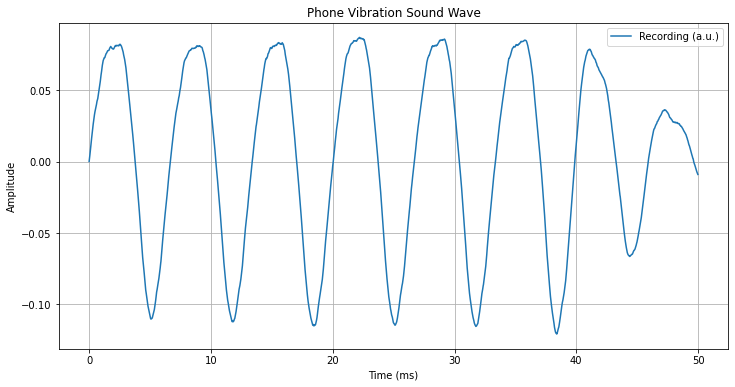

In [41]:
df.plot(
    x="Time (ms)",
    y="Recording (a.u.)",
    figsize=(12,6),
    grid=True,
    title="Phone Vibration Sound Wave",
    xlabel="Time (ms)",
    ylabel="Amplitude"
)

Let's look at the period of the wave: the amount of time it takes the wave to complete one cycle. Since I happen to have a large data set, my approach here is to take the average length of time required for each cycle to find the overall average period.

You can also think of period as the distance between two crests. In this case, I'm calculating period using the distance between two crests. In this case, I'm thinking about a crest as the point with the greatest y-value per cycle (you could also think about it as the single point in a cycle where the previous and next points both have lower y-values, but I didn't do that for reasons that will become evident later.)

Here's the math, in case you can't follow the code below:
$$
\frac{t_1 + t_2 + ... + t_n}{n}
$$
where:
- $n = \text{the number of crests in the sample}$
- $t = \text{period taken from a part of the sample}$ ($t_1$ = period between crests 1 and 2, $t_2$ between crests 2 and 3, and so on)
    - The period for each cycle is calculated as the distance between two crests, in milliseconds.

Let's create a list of crests:

In [42]:
import numpy as np

points = df['Recording (a.u.)'].tolist() # Store a list of the points from the sample.
crests = []
ends_of_cycles = []

for index, point in enumerate(points): # Go through each point one by one
    try:
        if point > 0 and points[index+1] < 0:
            ends_of_cycles.append(index)
    except IndexError:
        pass


cycles = [sl.tolist() for sl in np.split(points, ends_of_cycles)][:-1]
for cycle in cycles:
    crests.append(max(cycle))

print(crests)

[0.082345724, 0.081338927, 0.083528966, 0.087127939, 0.085977025, 0.085236259, 0.078825608, 0.03639885]


We can now calculate the average period in seconds using these crests, by taking an average:

In [43]:
sum = 0
prev = 0

for crest in crests:
    relevant_row = df.loc[df['Recording (a.u.)'] == crest]
    current_time = relevant_row['Time (ms)'].values[0]
    sum += (current_time - prev)
    prev = current_time

final_total = (sum / len(crests)) / 1000
final_total

0.0059090779949999995

We can calculate frequency with this. Frequency is the number of cycles in a given amount of time, expressed in periods/second or Hertz:

$$
\frac{1}{\text{period}}
= \frac{1}{0.0059090779949999995}
= 169.2311390789 \text{ Hz}
$$

## Future Improvements
- These waves are not "clean" - that is, there isn't a singular distinct point in each cycle that has a greater y-value than the previous and next ones, that I could use to locate the crest of the wave. Instead, the crests of waves were more "bumpy":

(0.05, 0.1)

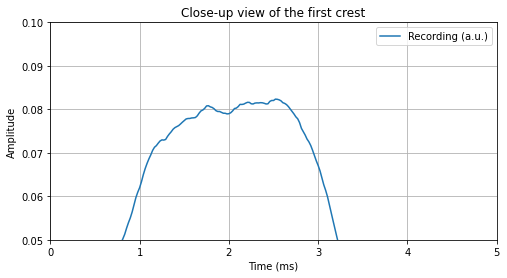

In [44]:
import matplotlib.pyplot as plt

df.plot(
    x="Time (ms)",
    y="Recording (a.u.)",
    figsize=(8,4),
    grid=True,
    title="Close-up view of the first crest",
    xlabel="Time (ms)",
    ylabel="Amplitude"
)
plt.xlim(0, 5)
plt.ylim(0.05, 0.1)